In [1]:
pip install xgboost

You should consider upgrading via the '/Users/rodrigomorais/.pyenv/versions/3.9.0/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import csv
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from ecgdetectors import Detectors
import os
from wettbewerb import load_references

Adding new features to the previous XGB model 

In [3]:
# Importiere EKG-Dateien, zugehörige Diagnose, Sampling-Frequenz (Hz) und Name

ecg_leads,ecg_labels,fs,ecg_names = load_references('./training')    # Wenn der Ordner mit der Database Training von moodle in einem anderen Ordner liegt, fügen Sie hier den korrigierten Pfad ein 

detectors = Detectors(fs)                                     # Initialisierung des QRS-Detektors

                                                              # Initialisierung der Feature-Arrays für Stationary Wavelet Transform Detector Detecto 
    
    
sdnn_swt = np.array([])                                       
hr_swt = np.array([])                                  
pNN20_swt = np.array([])                                  
pNN50_swt = np.array([])      
fAnalysis_swt = np.array([])   


KeyboardInterrupt: 

In [ ]:
from hrv import HRV

hrv_class = HRV(fs)


arr = np.zeros((6000,6))
diagnosis = np.zeros(6000,dtype='str')

for idx, ecg_lead in enumerate(ecg_leads):

    if len(ecg_lead) != 18000:
        m = 18000 // len(ecg_lead)
        new_ecg_lead = ecg_lead
        for i in range(0, m-1):
            new_ecg_lead = np.append(new_ecg_lead, ecg_lead)
        r = 18000 - len(new_ecg_lead)
        new_ecg_lead = np.append(new_ecg_lead, ecg_lead[:r])
        ecg_leads[idx] = new_ecg_lead
   
    r_peaks_swt = detectors.swt_detector(ecg_lead)              # Detektion der QRS-Komplexe mit Stationary Wavelet Transform Detector

#   sdnn_swt = np.std(np.diff(r_peaks_swt)/fs*1000)             # Berechnung der Standardabweichung der Schlag-zu-Schlag Intervalle (SDNN) in Millisekunden - Stationary Wavelet Transform
    sdnn_swt = hrv_class.SDNN(r_peaks_swt, True)
    rmssd_swt = hrv_class.RMSSD(r_peaks_swt)
    sdsd_swt = hrv_class.SDSD(r_peaks_swt)
    NN20_swt = hrv_class.NN20(r_peaks_swt)
    NN50_swt = hrv_class.NN50(r_peaks_swt)
#   fAnalysis_swt

    arr[idx][0] = idx
    arr[idx][1] = sdnn_swt
    arr[idx][2] = rmssd_swt
    arr[idx][3] = sdsd_swt
    arr[idx][4] = NN20_swt
    arr[idx][5] = NN50_swt
    
    
    if ecg_labels[idx] == 'N':
        diagnosis[idx] = 'N'
    if ecg_labels[idx] == 'A':
        diagnosis[idx] = 'A'
    if ecg_labels[idx] == 'O':
        diagnosis[idx] = 'O'
    if ecg_labels[idx] == '~':
        diagnosis[idx] = '~'
    if (idx % 100) == 0:
        print(str(idx) + "\t EKG Signale wurden verarbeitet.")

0	 EKG Signale wurden verarbeitet.
100	 EKG Signale wurden verarbeitet.
200	 EKG Signale wurden verarbeitet.
300	 EKG Signale wurden verarbeitet.
400	 EKG Signale wurden verarbeitet.
500	 EKG Signale wurden verarbeitet.
600	 EKG Signale wurden verarbeitet.
700	 EKG Signale wurden verarbeitet.
800	 EKG Signale wurden verarbeitet.
900	 EKG Signale wurden verarbeitet.
1000	 EKG Signale wurden verarbeitet.
1100	 EKG Signale wurden verarbeitet.
1200	 EKG Signale wurden verarbeitet.
1300	 EKG Signale wurden verarbeitet.
1400	 EKG Signale wurden verarbeitet.
1500	 EKG Signale wurden verarbeitet.
1600	 EKG Signale wurden verarbeitet.
1700	 EKG Signale wurden verarbeitet.
1800	 EKG Signale wurden verarbeitet.
1900	 EKG Signale wurden verarbeitet.
2000	 EKG Signale wurden verarbeitet.
2100	 EKG Signale wurden verarbeitet.
2200	 EKG Signale wurden verarbeitet.


/Users/rodrigomorais/.pyenv/versions/3.9.0/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rodrigomorais/.pyenv/versions/3.9.0/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rodrigomorais/.pyenv/versions/3.9.0/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rodrigomorais/.pyenv/versions/3.9.0/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rodrigomorais/.pyenv/versions/3.9.0/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype

2300	 EKG Signale wurden verarbeitet.
2400	 EKG Signale wurden verarbeitet.
2500	 EKG Signale wurden verarbeitet.
2600	 EKG Signale wurden verarbeitet.
2700	 EKG Signale wurden verarbeitet.
2800	 EKG Signale wurden verarbeitet.
2900	 EKG Signale wurden verarbeitet.
3000	 EKG Signale wurden verarbeitet.
3100	 EKG Signale wurden verarbeitet.
3200	 EKG Signale wurden verarbeitet.
3300	 EKG Signale wurden verarbeitet.
3400	 EKG Signale wurden verarbeitet.
3500	 EKG Signale wurden verarbeitet.
3600	 EKG Signale wurden verarbeitet.
3700	 EKG Signale wurden verarbeitet.
3800	 EKG Signale wurden verarbeitet.
3900	 EKG Signale wurden verarbeitet.
4000	 EKG Signale wurden verarbeitet.
4100	 EKG Signale wurden verarbeitet.
4200	 EKG Signale wurden verarbeitet.
4300	 EKG Signale wurden verarbeitet.
4400	 EKG Signale wurden verarbeitet.
4500	 EKG Signale wurden verarbeitet.
4600	 EKG Signale wurden verarbeitet.
4700	 EKG Signale wurden verarbeitet.
4800	 EKG Signale wurden verarbeitet.
4900	 EKG Si

In [ ]:
import pandas as pd

df = pd.DataFrame(arr, columns = ['index', 'SDNN', 'RMSSD', 'SDSD', 'NN20', 'NN50'])
df.drop(['index'],axis=1, inplace = True)
df.rename(columns = {'level_0':'index'}, inplace = True)
df['diagnosis'] = diagnosis

df

,SDNN,RMSSD,SDSD,NN20,NN50,diagnosis
0,0.050097,61.293918,60.353735,18.0,9.0,N
1,0.063049,52.383910,52.144742,13.0,8.0,N
2,0.137136,107.316518,107.309672,51.0,36.0,O
3,0.047354,70.161483,70.133672,23.0,15.0,N
4,0.172107,176.694180,176.631067,45.0,42.0,O
...,...,...,...,...,...,...
5995,0.340999,224.238630,224.010554,56.0,46.0,~
5996,0.136465,75.485303,75.459248,54.0,34.0,A
5997,0.123708,192.678969,192.677246,33.0,19.0,O
5998,0.357294,295.408714,294.693932,24.0,21.0,O


In [ ]:
df.dropna(inplace=True)
df

,SDNN,RMSSD,SDSD,NN20,NN50,diagnosis
0,0.050097,61.293918,60.353735,18.0,9.0,N
1,0.063049,52.383910,52.144742,13.0,8.0,N
2,0.137136,107.316518,107.309672,51.0,36.0,O
3,0.047354,70.161483,70.133672,23.0,15.0,N
4,0.172107,176.694180,176.631067,45.0,42.0,O
...,...,...,...,...,...,...
5995,0.340999,224.238630,224.010554,56.0,46.0,~
5996,0.136465,75.485303,75.459248,54.0,34.0,A
5997,0.123708,192.678969,192.677246,33.0,19.0,O
5998,0.357294,295.408714,294.693932,24.0,21.0,O


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
X=df[df.columns[:-1]]
y=df['diagnosis']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Using all detectors:')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred, average='weighted'))

Using all detectors:
Accuracy: 0.5944153577661431
F1: 0.5746108488676867


Max Accuracy: 0.7472949389179756
Max F1: 0.7460417889835863


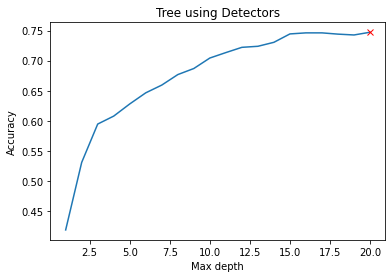

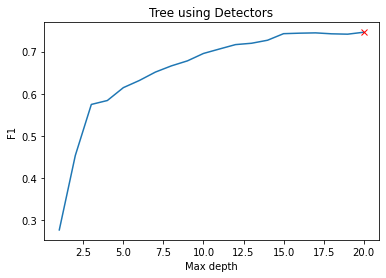

In [ ]:
thresholds = np.linspace(1, 20, num=20)    # Liste aller möglichen Schwellwerte
F1 = np.array([])
acc = np.array([])
for th in thresholds:
    clf = DecisionTreeClassifier(max_depth=int(th))
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    F1 = np.append(F1, metrics.f1_score(y_test, y_pred, average='weighted'))
    acc = np.append(acc, metrics.accuracy_score(y_test, y_pred))
    
F1_opt = thresholds[np.argmax(F1)] 
acc_opt = thresholds[np.argmax(acc)]

print("Max Accuracy:",np.amax(acc))
print("Max F1:",np.amax(F1))

fig, ax = plt.subplots()
ax.plot(thresholds,acc)
ax.plot(acc_opt,acc[np.argmax(acc)],'xr')
ax.set_title("Tree using Detectors")
ax.set_xlabel("Max depth")
ax.set_ylabel("Accuracy")
plt.show()

fig, ax = plt.subplots()
ax.plot(thresholds,F1)
ax.plot(F1_opt,F1[np.argmax(F1)],'xr')
ax.set_title("Tree using Detectors")
ax.set_xlabel("Max depth")
ax.set_ylabel("F1")
plt.show()

# Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=10,max_depth=30,bootstrap=True,min_samples_leaf=5, class_weight="balanced")
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.7605584642233857
F1: 0.7559798983850334


In [ ]:
n = 30
thresholds = np.linspace((1,11), (n,40), num=n)    # Liste aller möglichen Schwellwerte
leaf_values = np.linspace(1, 10, num=10)             # Liste aller möglichen Schwellwerte für den dritte Parameter
X_th = np.array([])
Y_th = np.array([])
Z_th = np.array([])
F1 = np.array([])
acc = np.array([])
for thx in thresholds[:,0]:
    for thy in thresholds[:,1]:
        for thz in leaf_values:
            clf = RandomForestClassifier(n_estimators= int(thx), max_depth=int(thy), bootstrap=True, min_samples_leaf=int(thz), class_weight="balanced")
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            X_th = np.append(X_th, thx)
            Y_th = np.append(Y_th, thy)
            Z_th = np.append(Z_th, thz)

            F1 = np.append(F1, metrics.f1_score(y_test, y_pred, average='weighted'))
            acc = np.append(acc, metrics.accuracy_score(y_test, y_pred))
        
F1_opt = F1[np.argmax(F1)] 
acc_opt = acc[np.argmax(acc)]

print("Max Accuracy:",acc_opt)
print("Max F1:",F1_opt)

KeyboardInterrupt: 

In [ ]:
print("Optimal Number os Estimators for Accuracy:", X_th[np.argmax(acc)])
print("Optimal Max Depth for Accuracy:", Y_th[np.argmax(acc)])
print("Optimal Min Samples Leaf for Accuracy:", Z_th[np.argmax(acc)])
print("Optimal Number os Estimators for F1:", X_th[np.argmax(F1)])
print("Optimal Max Depth for F1:", Y_th[np.argmax(F1)])
print("Optimal Min Samples Leaf for F1:", Z_th[np.argmax(F1)])

Optimal Number os Estimators for Accuracy: 23.0
Optimal Max Depth for Accuracy: 16.0
Optimal Min Samples Leaf for Accuracy: 1.0
Optimal Number os Estimators for F1: 16.0
Optimal Max Depth for F1: 18.0
Optimal Min Samples Leaf for F1: 2.0


# XGB

In [ ]:
arr = df.to_numpy()
X = arr[:,:-1]
y = arr[:,-1]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = encoder.inverse_transform(y_pred)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.6813131313131313
F1: 0.6685110125035012


In [ ]:
arr = df.to_numpy()
X = arr[:,:-1]
y = arr[:,-1]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

n = 15
thresholds = np.linspace((1,0.01), (n,0.3), num=n)    # Liste aller möglichen Schwellwerte
X_th = np.array([])
Y_th = np.array([])
Z_th = np.array([])

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

F1 = np.array([])
acc = np.array([])
for thx in thresholds[:,0]:
    print()
    print()
    print("thx =", thx)
    for thy in thresholds[:,1]:
        for thz in range(3,9):
            
            model = xgb.XGBClassifier(n_estimators= int(thx), learning_rate = thy, max_depth = int(thz))
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            y_pred = encoder.inverse_transform(y_pred)
            

            X_th = np.append(X_th, thx)
            Y_th = np.append(Y_th, thy)
            Z_th = np.append(Z_th, thz)
            

            F1 = np.append(F1, metrics.f1_score(y_test, y_pred, average='weighted'))
            acc = np.append(acc, metrics.accuracy_score(y_test, y_pred))

F1_opt = F1[np.argmax(F1)] 
acc_opt = acc[np.argmax(acc)]

print()
print()
print("Max Accuracy:",acc_opt)
print("Max F1:",F1_opt)



thx = 1.0


thx = 2.0


thx = 3.0


thx = 4.0


thx = 5.0


thx = 6.0


thx = 7.0


thx = 8.0


thx = 9.0


thx = 10.0


thx = 11.0


thx = 12.0


thx = 13.0


thx = 14.0


thx = 15.0


Max Accuracy: 0.7095959595959596
Max F1: 0.6918097818739821


In [ ]:
print("Optimal Number os Estimators for Accuracy:", X_th[np.argmax(acc)])
print("Optimal Learning Rate for Accuracy:", Y_th[np.argmax(acc)])
print("Optimal Max Depth for Accuracy", Z_th[np.argmax(acc)])
print()
print("Optimal Number os Estimators for F1:", X_th[np.argmax(F1)])
print("Optimal Learning Rate for F1:", Y_th[np.argmax(F1)])
print("Optimal Max Depth for F1", Z_th[np.argmax(F1)])

Optimal Number os Estimators for Accuracy: 11.0
Optimal Learning Rate for Accuracy: 0.155
Optimal Max Depth for Accuracy 5.0

Optimal Number os Estimators for F1: 11.0
Optimal Learning Rate for F1: 0.155
Optimal Max Depth for F1 5.0
